## Epigenetics Project

This project is made to analyze and compile data regarding the various factors that affect certain biological aspects in human development. The range of this project starts from global trends and trickles down into a specific focus on India. The specific focus on India is done to see how certain factors affect human development in males and females. The project ends with possible factors that can be explored.

## Imports and Initial Set-Up

Very-self explanatory, but this project uses a combination of frameworks in Python. These frameworks include pandas for processing the data, matplotlib for creating the plots, seaborn for actually displaying the plots, sklearn for future predictions and linear regression, geopandas for geographical data and shapefiles, numpy for mathematical functions and dealing with arrays, and scipy for correlational coefficients.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import geopandas as gpd
import numpy as np
from scipy.stats import linregress

# Load the data
iq_data_path = '/Users/jayanth/Desktop/Personal Projects/Nutrition/archive(8)/avgIQpercountry.csv'
nutri_path = '/Users/jayanth/Desktop/Personal Projects/Nutrition/archive(10)/Protein_Supply_Quantity_Data.csv'
risk_factors_path = '/Users/jayanth/Desktop/Personal Projects/Nutrition/number-of-deaths-by-risk-factor.csv'
height_data_path = '/Users/jayanth/Desktop/Personal Projects/Nutrition/annual-change-in-average-male-height.csv'
life_data_path = '/Users/jayanth/Desktop/Personal Projects/Nutrition/Life Expectancy Data.csv'
dietary_path = '/Users/jayanth/Desktop/Personal Projects/Nutrition/archive(5)/Country Dietary Needs.csv'
inter_path = '/Users/jayanth/Desktop/Personal Projects/Nutrition/archive(5)/Country Intervention.csv'

iq_data = pd.read_csv(iq_data_path)
nutri_data = pd.read_csv(nutri_path)
risk_factors_data = pd.read_csv(risk_factors_path)
height_data = pd.read_csv(height_data_path)
life_data = pd.read_csv(life_data_path)
dietary_data = pd.read_csv(dietary_path)
inter_data = pd.read_csv(inter_path)

## Cleaning Data

Here, we account for any missing values in the provided excel files to allow for easier data searching. We do this step to account for all the variables to be controlled as well as making sure that the values are displayed properly.

In [7]:
# Display the first few rows of the data
print(iq_data.head())
print(nutri_data.head())
print(risk_factors_data.head())
print(height_data.head())
print(life_data.head())
print(dietary_data.head())
print(inter_data.head())

# Check for missing values in iq_data and nutri_data
print("Missing values in iq_data per column:")
print(iq_data.isna().sum())

print("Missing values in nutri_data per column:")
print(nutri_data.isna().sum())

print("Missing values in risk_factors_data per column:")
print(risk_factors_data.isna().sum())

# Check for missing values in the height data
print("Missing values in height_data per column:")
print(height_data.isna().sum())

# Check for missing values in the life data
print("Missing values in life_data per column:")
print(life_data.isna().sum())

# Check for missing values in the secondary nutri data
print("Missing values in life_data per column:")
print(dietary_data.isna().sum())

# Check for missing values in the secondary nutri data
print("Missing values in inter_data per column:")
print(inter_data.isna().sum())

# Ensure 'Population - 2023' is numeric
iq_data['Population - 2023'] = pd.to_numeric(iq_data['Population - 2023'], errors='coerce')

print(iq_data.columns)

# Ensure 'Population ' is numeric
nutri_data['Population'] = pd.to_numeric(nutri_data['Population'], errors='coerce')

print(nutri_data.columns)

# Drop rows with missing values in critical columns for the analysis
iq_data_clean = iq_data.dropna(subset=['Average IQ', 'Population - 2023', 'HDI (2021)', 'Mean years of schooling - 2021', 'GNI - 2021'])
print(iq_data_clean.columns)

nutri_data_clean = nutri_data.dropna(subset=['Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Meat', 'Milk - Excluding Butter', 'Offals', 'Vegetal Products', 'Obesity', 'Undernourished'])
print(nutri_data_clean.columns)

risk_factors_data_clean = risk_factors_data.dropna(subset=['Unsafe water source', 'Unsafe sanitation', 'Non-exclusive breastfeeding' , 'Discontinued breastfeeding', 'Child wasting', 'Child stunting', 'Low physical activity'])
print(risk_factors_data_clean.columns)

# Check if the required columns exist in life_data
required_columns = ['HIV/AIDS', 'thinness 1-19 years']
existing_columns = [col for col in required_columns if col in life_data.columns]

life_data_clean = life_data.dropna(subset=existing_columns)
print(life_data_clean.columns)

   Rank    Country  Average IQ Continent  Literacy Rate  Nobel Prices  \
0     1      Japan      106.48      Asia           0.99            29   
1     2     Taiwan      106.47      Asia           0.96             4   
2     3  Singapore      105.89      Asia           0.97             0   
3     4  Hong Kong      105.37      Asia           0.94             1   
4     5      China      104.10      Asia           0.96             8   

   HDI (2021)  Mean years of schooling - 2021  GNI - 2021 Population - 2023  
0       0.925                            13.4     42274.0         123294513  
1         NaN                             NaN         NaN          10143543  
2       0.939                            11.9     90919.0           6014723  
3       0.952                            12.2     62607.0           7491609  
4       0.768                             7.6     17504.0        1425671352  
               Country  Alcoholic Beverages  Animal Products  Animal fats  \
0          Afgha

## Creating Quartiles and Aggregate Data

These quartiles are used for the graphs that implement the Average IQ as a variable. This will allow for easier visualization of the data points. In addition, we aggregate the data since we are looking for specific independent variables that cause for the IQ to vary.

In [8]:
# Calculate quartiles
quartiles = iq_data_clean['Average IQ'].quantile([0.25, 0.5, 0.75])
print(quartiles)

# Function to determine the quartile of a given value
def assign_quartile(value, quartiles):
    if value <= quartiles[0.25]:
        return '1st Quartile'
    elif value <= quartiles[0.5]:
        return '2nd Quartile'
    elif value <= quartiles[0.75]:
        return '3rd Quartile'
    else:
        return '4th Quartile'

# Assign quartiles to each country
iq_data_clean['IQ Quartile'] = iq_data_clean['Average IQ'].apply(assign_quartile, quartiles=quartiles)

# Convert population to millions for plotting
iq_data_clean['Population (Millions)'] = iq_data_clean['Population - 2023'] / 1e6

# Columns for aggregation
columns_to_aggregate = [
    'HIV/AIDS', 'thinness 1-19 years'
]

# Aggregate the data from 2000 to 2015 for each country
aggregated_data = life_data.groupby(['Country', 'Status'])[columns_to_aggregate].sum().reset_index()

print(aggregated_data.head())

0.25    74.170
0.50    82.990
0.75    91.225
Name: Average IQ, dtype: float64
               Country      Status  HIV/AIDS  thinness 1-19 years
0          Afghanistan  Developing       1.6                265.3
1              Albania  Developing       1.6                 25.9
2              Algeria  Developing       1.6                 97.5
3               Angola  Developing      37.9                 99.1
4  Antigua and Barbuda  Developing       2.0                 54.8


/var/folders/pt/j6cwr8hs3rb7xk73w3v87cd40000gn/T/ipykernel_19776/2161782396.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iq_data_clean['IQ Quartile'] = iq_data_clean['Average IQ'].apply(assign_quartile, quartiles=quartiles)
/var/folders/pt/j6cwr8hs3rb7xk73w3v87cd40000gn/T/ipykernel_19776/2161782396.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iq_data_clean['Population (Millions)'] = iq_data_clean['Population - 2023'] / 1e6


## Average IQ vs Population (in millions)

This is a scatterplot highlighting the relationship between Average IQ vs Population in all the worldwide countries. A linear model is made as well as the correlation coefficient displayed.

Correlation coefficient (r) for IQ vs Population: 0.07333404256354248
Coefficient of determination (r^2) for IQ vs Population: 0.005377881798711459


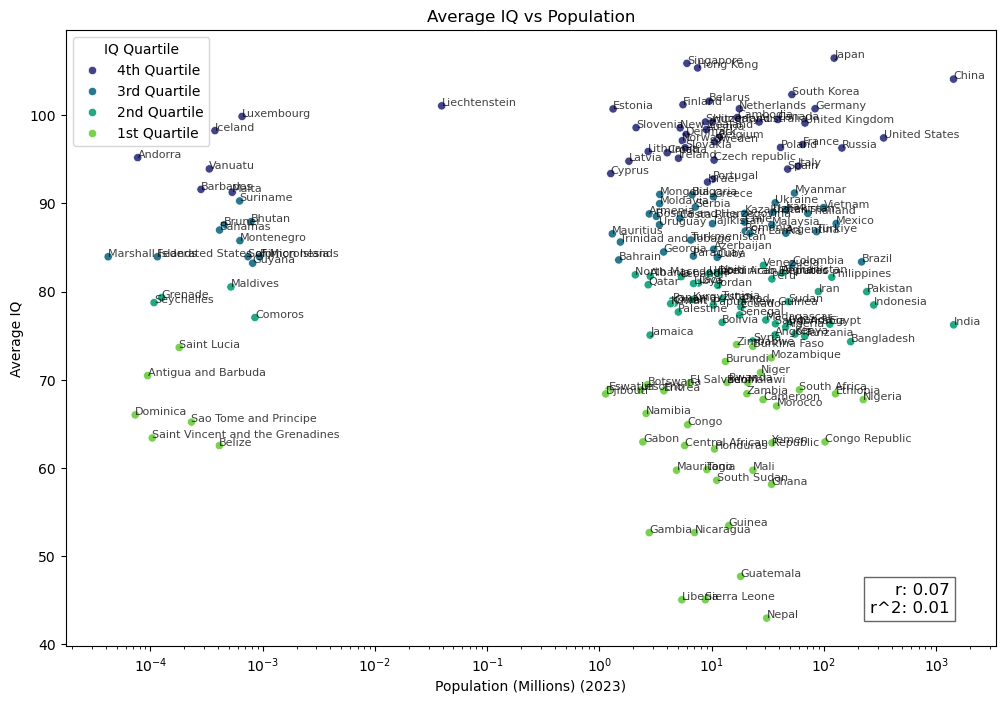

In [9]:
# Scatter plot of Average IQ vs Population (in millions)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=iq_data_clean, x='Population (Millions)', y='Average IQ', hue='IQ Quartile', palette='viridis')
plt.title('Average IQ vs Population')
plt.xlabel('Population (Millions) (2023)')
plt.ylabel('Average IQ')
plt.xscale('log')  # Optional: Use log scale if population range is large

# Label each point with the country name
for i, row in iq_data_clean.iterrows():
    plt.text(row['Population (Millions)'], row['Average IQ'], row['Country'], fontsize=8, alpha=0.75)

# Fit linear model
X = iq_data_clean[['Population (Millions)']]
y = iq_data_clean['Average IQ']
model = LinearRegression().fit(X, y)
r_squared = model.score(X, y)
correlation_coefficient = np.sqrt(r_squared)
print(f"Correlation coefficient (r) for IQ vs Population: {correlation_coefficient}")
print(f"Coefficient of determination (r^2) for IQ vs Population: {r_squared}")

# Display r and r^2 on the plot
plt.text(0.95, 0.05, f'r: {correlation_coefficient:.2f}\nr^2: {r_squared:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

plt.legend(title='IQ Quartile')
plt.show()

In [ ]:
# Scatter plot of Average IQ vs HDI
plt.figure(figsize=(12, 8))
sns.scatterplot(data=iq_data_clean, x='HDI (2021)', y='Average IQ', hue='IQ Quartile', palette='viridis')
plt.title('Average IQ vs Human Development Index (HDI)')
plt.xlabel('Human Development Index (HDI) (2021)')
plt.ylabel('Average IQ')

# Label each point with the country name
for i, row in iq_data_clean.iterrows():
    plt.text(row['HDI (2021)'], row['Average IQ'], row['Country'], fontsize=8, alpha=0.75)

# Fit linear model
X = iq_data_clean[['HDI (2021)']]
y = iq_data_clean['Average IQ']
model = LinearRegression().fit(X, y)
r_squared = model.score(X, y)
correlation_coefficient = np.sqrt(r_squared)
print(f"Correlation coefficient (r) for IQ vs HDI: {correlation_coefficient}")
print(f"Coefficient of determination (r^2) for IQ vs HDI: {r_squared}")

# Display r and r^2 on the plot
plt.text(0.95, 0.05, f'r: {correlation_coefficient:.2f}\nr^2: {r_squared:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

plt.legend(title='IQ Quartile')
plt.show()

In [ ]:
# Scatter plot of Average IQ vs GNI - 2021
plt.figure(figsize=(12, 8))
sns.scatterplot(data=iq_data_clean, x='GNI - 2021', y='Average IQ', hue='IQ Quartile', palette='viridis')
plt.title('Average IQ vs GNI - 2021')
plt.xlabel('GNI (2021)')
plt.ylabel('Average IQ')
plt.xscale('log')  # Optional: Use log scale if GNI range is large

# Label each point with the country name
for i, row in iq_data_clean.iterrows():
    plt.text(row['GNI - 2021'], row['Average IQ'], row['Country'], fontsize=8, alpha=0.75)

# Fit linear model
X = iq_data_clean[['GNI - 2021']]
y = iq_data_clean['Average IQ']
model = LinearRegression().fit(X, y)
r_squared = model.score(X, y)
correlation_coefficient = np.sqrt(r_squared)
print(f"Correlation coefficient (r) for IQ vs GNI: {correlation_coefficient}")
print(f"Coefficient of determination (r^2) for IQ vs GNI: {r_squared}")

# Display r and r^2 on the plot
plt.text(0.95, 0.05, f'r: {correlation_coefficient:.2f}\nr^2: {r_squared:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

plt.legend(title='IQ Quartile')
plt.show()

In [ ]:
# Scatter plot of Average IQ vs Mean years of schooling - 2021
plt.figure(figsize=(12, 8))
sns.scatterplot(data=iq_data_clean, x='Mean years of schooling - 2021', y='Average IQ', hue='IQ Quartile', palette='viridis')
plt.title('Average IQ vs Mean Years of Schooling - 2021')
plt.xlabel('Mean Years of Schooling - 2021')
plt.ylabel('Average IQ')
plt.xscale('log')  # Optional: Use log scale if range of schooling years is large

# Label each point with the country name
for i, row in iq_data_clean.iterrows():
    plt.text(row['Mean years of schooling - 2021'], row['Average IQ'], row['Country'], fontsize=8, alpha=0.75)

# Fit linear model
X = iq_data_clean[['Mean years of schooling - 2021']]
y = iq_data_clean['Average IQ']
model = LinearRegression().fit(X, y)
r_squared = model.score(X, y)
correlation_coefficient = np.sqrt(r_squared)
print(f"Correlation coefficient (r) for IQ vs Mean Years of Schooling: {correlation_coefficient}")
print(f"Coefficient of determination (r^2) for IQ vs Mean Years of Schooling: {r_squared}")

# Display r and r^2 on the plot
plt.text(0.95, 0.05, f'r: {correlation_coefficient:.2f}\nr^2: {r_squared:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

plt.legend(title='IQ Quartile')
plt.show()

In [ ]:
# Convert '<2.5' to a numeric value, e.g., 2.0
nutri_data_clean['Undernourished'] = nutri_data_clean['Undernourished'].apply(lambda x: 2.0 if x == '<2.5' else float(x))

# Scatter plot of Milk - Excluding Butter vs. Undernourished
plt.figure(figsize=(12, 8))
sns.scatterplot(data=nutri_data_clean, x='Milk - Excluding Butter', y='Undernourished', palette='viridis')
plt.title('Milk - Excluding Butter vs. Undernourished')
plt.xlabel('Milk - Excluding Butter')
plt.ylabel('Undernourished')
plt.xscale('log')  # Optional: Use log scale if population range is large

# Label each point with the country name
for i, row in nutri_data_clean.iterrows():
    plt.text(row['Milk - Excluding Butter'], row['Undernourished'], row['Country'], fontsize=8, alpha=0.75)

# Fit linear model
X = nutri_data_clean[['Milk - Excluding Butter']]
y = nutri_data_clean['Undernourished']
model = LinearRegression().fit(X, y)
r_squared = model.score(X, y)
correlation_coefficient = model.coef_[0]
print(f"Coefficient (slope) for Milk - Excluding Butter vs. Undernourished: {correlation_coefficient}")
print(f"Coefficient of determination (r^2) for Milk - Excluding Butter vs. Undernourished: {r_squared}")

# Display r and r^2 on the plot
plt.text(0.95, 0.05, f'r: {correlation_coefficient:.2f}\nr^2: {r_squared:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

plt.show()

In [ ]:
# Calculate ratios for obesity/malnourished
nutri_data_clean['Obesity_Malnourished_Ratio'] = nutri_data_clean['Obesity'] / nutri_data_clean['Undernourished']

# Create a new variable combining meat, eggs, and milk
nutri_data_clean['Combined_Protein'] = nutri_data_clean['Meat'] + nutri_data_clean['Eggs'] + nutri_data_clean['Milk - Excluding Butter']

# Scatter plot of Milk - Excluding Butter vs. Obesity_Malnourished_Ratio
plt.figure(figsize=(12, 8))
sns.scatterplot(data=nutri_data_clean, x='Milk - Excluding Butter', y='Obesity_Malnourished_Ratio', palette='viridis')
plt.title('Milk - Excluding Butter vs. Obesity/Malnourished Ratio')
plt.xlabel('Milk - Excluding Butter')
plt.ylabel('Obesity/Malnourished Ratio')
plt.xscale('log')  # Optional: Use log scale if range of milk consumption is large

# Label each point with the country name
for i, row in nutri_data_clean.iterrows():
    plt.text(row['Milk - Excluding Butter'], row['Obesity_Malnourished_Ratio'], row['Country'], fontsize=8, alpha=0.75)

# Fit linear model
X = nutri_data_clean[['Milk - Excluding Butter']]
y = nutri_data_clean['Obesity_Malnourished_Ratio']
model = LinearRegression().fit(X, y)
r_squared = model.score(X, y)
correlation_coefficient = model.coef_[0]
print(f"Coefficient (slope) for Milk - Excluding Butter vs. Obesity/Malnourished Ratio: {correlation_coefficient}")
print(f"Coefficient of determination (r^2) for Milk - Excluding Butter vs. Obesity/Malnourished Ratio: {r_squared}")

# Display r and r^2 on the plot
plt.text(0.95, 0.05, f'r: {correlation_coefficient:.2f}\nr^2: {r_squared:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

plt.show()

In [ ]:
# Scatter plot of Combined_Protein vs. Obesity_Malnourished_Ratio
plt.figure(figsize=(12, 8))
sns.scatterplot(data=nutri_data_clean, x='Combined_Protein', y='Obesity_Malnourished_Ratio', palette='viridis')
plt.title('Combined Protein vs. Obesity/Malnourished Ratio')
plt.xlabel('Combined Protein (Meat + Eggs + Milk)')
plt.ylabel('Obesity/Malnourished Ratio')

# Label each point with the country name
for i, row in nutri_data_clean.iterrows():
    plt.text(row['Combined_Protein'], row['Obesity_Malnourished_Ratio'], row['Country'], fontsize=8, alpha=0.75)

# Fit linear model
X = nutri_data_clean[['Combined_Protein']]
y = nutri_data_clean['Obesity_Malnourished_Ratio']
model = LinearRegression().fit(X, y)
r_squared = model.score(X, y)
correlation_coefficient = model.coef_[0]
print(f"Coefficient (slope) for Combined Protein vs. Obesity/Malnourished Ratio: {correlation_coefficient}")
print(f"Coefficient of determination (r^2) for Combined Protein vs. Obesity/Malnourished Ratio: {r_squared}")

# Display r and r^2 on the plot
plt.text(0.95, 0.05, f'r: {correlation_coefficient:.2f}\nr^2: {r_squared:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

plt.show()

In [ ]:
# Extract data for India and specific columns of interest
india_data = risk_factors_data[(risk_factors_data['Entity'] == 'India') & (risk_factors_data['Year'] >= 1990) & (risk_factors_data['Year'] <= 2017)]
columns_of_interest = ['Year', 'Iron deficiency', 'Low bone mineral density']
india_data = india_data[columns_of_interest]

# Plotting the bar graph for Iron deficiency
plt.figure(figsize=(12, 8))
sns.barplot(data=india_data, x='Year', y='Iron deficiency', color='red')
plt.title('Iron Deficiency in India (1990 - 2017)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths due to Iron Deficiency')
plt.show()

# Scatter plot for the correlation between Iron deficiency and Low bone mineral density
plt.figure(figsize=(12, 8))
sns.scatterplot(data=india_data, x='Iron deficiency', y='Low bone mineral density')
plt.title('Correlation between Iron Deficiency and Low Bone Mineral Density in India')
plt.xlabel('Number of Deaths due to Iron Deficiency')
plt.ylabel('Number of Deaths due to Low Bone Mineral Density')

# Fit linear model
X = india_data[['Iron deficiency']]
y = india_data['Low bone mineral density']
model = LinearRegression().fit(X, y)
r_squared = model.score(X, y)
correlation_coefficient = np.sqrt(r_squared)
print(f"Correlation coefficient (r) for Iron Deficiency vs Low Bone Mineral Density: {correlation_coefficient}")
print(f"Coefficient of determination (r^2) for Iron Deficiency vs Low Bone Mineral Density: {r_squared}")

# Display r and r^2 on the plot
plt.text(0.95, 0.05, f'r: {correlation_coefficient:.2f}\nr^2: {r_squared:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

plt.show()

work on this

In [ ]:
# Scatter plot of Low Physical Activity and Child Stunting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=iq_data_clean, x='GNI - 2021', y='Average IQ', hue='IQ Quartile', palette='viridis')
plt.title('Average IQ vs GNI - 2021')
plt.xlabel('GNI (2021)')
plt.ylabel('Average IQ')
plt.xscale('log')  # Optional: Use log scale if GNI range is large

# Label each point with the country name
for i, row in iq_data_clean.iterrows():
    plt.text(row['GNI - 2021'], row['Average IQ'], row['Country'], fontsize=8, alpha=0.75)

# Fit linear model
X = iq_data_clean[['GNI - 2021']]
y = iq_data_clean['Average IQ']
model = LinearRegression().fit(X, y)
r_squared = model.score(X, y)
correlation_coefficient = np.sqrt(r_squared)
print(f"Correlation coefficient (r) for IQ vs GNI: {correlation_coefficient}")
print(f"Coefficient of determination (r^2) for IQ vs GNI: {r_squared}")

# Display r and r^2 on the plot
plt.text(0.95, 0.05, f'r: {correlation_coefficient:.2f}\nr^2: {r_squared:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

plt.show()

In [ ]:
# Analysis on Mean Male and Female Height

# Bar plot for Mean Male Height (cm) in 1996
plt.figure(figsize=(14, 10))
height_1996 = height_data[height_data['Year'] == 1996]
height_1996_sorted_male = height_1996.sort_values(by='Mean male height (cm)')
sns.barplot(data=height_1996_sorted_male, x='Entity', y='Mean male height (cm)', palette='viridis')
plt.title('Mean Male Height (cm) in 1996')
plt.xlabel('Country')
plt.ylabel('Mean Male Height (cm)')
plt.xticks(rotation=90, ha='right')
plt.show()

# Bar plot for Mean Female Height (cm) in 1996
plt.figure(figsize=(14, 10))
height_1996_sorted_female = height_1996.sort_values(by='Mean female height (cm)')
sns.barplot(data=height_1996_sorted_female, x='Entity', y='Mean female height (cm)', palette='viridis')
plt.title('Mean Female Height (cm) in 1996')
plt.xlabel('Country')
plt.ylabel('Mean Female Height (cm)')
plt.xticks(rotation=90, ha='right')
plt.show()

# Filter the height data for India from 1896 to 1996
height_india = height_data[(height_data['Entity'] == 'India') & (height_data['Year'] >= 1896) & (height_data['Year'] <= 1996)]

# Bar plot for Mean Male Height (cm) in India from 1896 to 1996
plt.figure(figsize=(12, 8))
sns.barplot(data=height_india, x='Year', y='Mean male height (cm)', palette='viridis')
plt.title('Mean Male Height (cm) in India (1896-1996)')
plt.xlabel('Year')
plt.ylabel('Mean Male Height (cm)')
plt.xticks(rotation=90)
plt.show()

# Bar plot for Mean Female Height (cm) in India from 1896 to 1996
plt.figure(figsize=(12, 8))
sns.barplot(data=height_india, x='Year', y='Mean female height (cm)', palette='viridis')
plt.title('Mean Female Height (cm) in India (1896-1996)')
plt.xlabel('Year')
plt.ylabel('Mean Female Height (cm)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Define color mapping based on status
colors = {'Developed': 'blue', 'Developing': 'red'}
aggregated_data['Color'] = aggregated_data['Status'].map(colors)

def find_country_info(country_name, data, column):
    country_data = data[data['Country'] == country_name]
    if not country_data.empty:
        country_value = country_data[column].values[0]
        total_value = data[column].sum()
        country_share = (country_value / total_value) * 100
        rank = data.sort_values(by=column, ascending=False).reset_index(drop=True)
        country_rank = rank[rank['Country'] == country_name].index[0] + 1
        return country_share, country_rank
    else:
        return None, None

# Example: Find information for 'India' for HIV/AIDS
country_name = 'India'
column = 'HIV/AIDS'
share_hiv, rank_hiv = find_country_info(country_name, aggregated_data, column)
if share_hiv is not None:
    print(f"{country_name} has a {share_hiv:.2f}% share of {column} and is ranked {rank_hiv}.")
else:
    print(f"{country_name} not found in the data.")

# Example: Find information for 'India' for thinness 1-19 years
column = 'thinness 1-19 years'
share_thinness, rank_thinness = find_country_info(country_name, aggregated_data, column)
if share_thinness is not None:
    print(f"{country_name} has a {share_thinness:.2f}% share of {column} and is ranked {rank_thinness}.")
else:
    print(f"{country_name} not found in the data.")

# Create a pie chart for HIV/AIDS
plt.figure(figsize=(12, 8))
plt.pie(aggregated_data['HIV/AIDS'], labels=aggregated_data['Country'], colors=aggregated_data['Color'],
        autopct='%1.1f%%', startangle=140)
plt.title('HIV/AIDS Share by Country (2000-2015)')
# Display India's statistic on the pie chart
if share_hiv is not None:
    plt.text(-1.5, 1, f"India: {share_hiv:.2f}%\nRank: {rank_hiv}", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
plt.show()

# Create a pie chart for Thinness 1-19 years
plt.figure(figsize=(12, 8))
plt.pie(aggregated_data['thinness 1-19 years'], labels=aggregated_data['Country'], colors=aggregated_data['Color'],
        autopct='%1.1f%%', startangle=140)
plt.title('Thinness 1-19 Years Share by Country (2000-2015)')
# Display India's statistic on the pie chart
if share_thinness is not None:
    plt.text(-1.5, 1, f"India: {share_thinness:.2f}%\nRank: {rank_thinness}", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
plt.show()

In [ ]:
# Filter data for the year 2017 and remove duplicates
risk_factors_data_clean_2017 = risk_factors_data_clean[risk_factors_data_clean['Year'] == 2017].drop_duplicates(subset=['Entity'])

# Calculate the rank of India based on 'Child stunting'
risk_factors_data_clean_2017 = risk_factors_data_clean_2017.sort_values(by='Child stunting', ascending=False).reset_index(drop=True)
india_rank = risk_factors_data_clean_2017[risk_factors_data_clean_2017['Entity'] == 'India'].index[0] + 1
total_entities = risk_factors_data_clean_2017.shape[0]

# Scatter plot of Low physical activity vs. Child stunting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=risk_factors_data_clean_2017, x='Low physical activity', y='Child stunting', hue='Entity', palette='viridis', legend=None)
plt.title('Low Physical Activity vs. Child Stunting in 2017')
plt.xlabel('Number of Deaths from Low Physical Activity')
plt.ylabel('Number of Deaths from Child Stunting')

# Label each point with the country name
for i, row in risk_factors_data_clean_2017.iterrows():
    plt.text(row['Low physical activity'], row['Child stunting'], row['Entity'], fontsize=8, alpha=0.75)

# Fit linear model
X = risk_factors_data_clean_2017[['Low physical activity']]  # Ensure X is a 2D array
y = risk_factors_data_clean_2017['Child stunting']
model = LinearRegression().fit(X, y)
r_squared = model.score(X, y)
correlation_coefficient = np.sqrt(r_squared)
print(f"Correlation coefficient (r) for Low physical activity vs. Child stunting: {correlation_coefficient}")
print(f"Coefficient of determination (r^2) for Low physical activity vs. Child stunting: {r_squared}")

# Display r and r^2 on the plot
plt.text(0.95, 0.05, f'r: {correlation_coefficient:.2f}\nr^2: {r_squared:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

# Display India's rank on the plot
plt.text(0.05, 0.95, f'India is in {india_rank}th place out of {total_entities} entities in 2017', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

# Show plot
plt.show()

In [ ]:
# Filter out necessary information and clean the data by removing rows with NaN values in relevant columns
dietary_data_clean = dietary_data.dropna(subset=['Whole grains', 'Red meat', 'Fish', 'Dairy'])

# Recalculate the combination of Fish, Dairy, and Red Meat after cleaning
nuts_fish_dairy_red_meat_clean = dietary_data_clean[['Nuts', 'Fish', 'Dairy', 'Red meat']].sum(axis=1)

# Function to find India's share and rank
def find_country_info(country_name, data, column):
    country_data = data[data['country'] == country_name]
    if not country_data.empty:
        country_value = country_data[column].values[0]
        total_value = data[column].sum()
        country_share = (country_value / total_value) * 100
        rank = data.sort_values(by=column, ascending=False).reset_index(drop=True)
        country_rank = rank[rank['country'] == country_name].index[0] + 1
        total_countries = len(data['country'])
        return country_share, country_rank, total_countries
    else:
        return None, None, None

# Find information for 'India' for each category after cleaning
country_name = 'India'
share_whole_grains, rank_whole_grains, total_countries = find_country_info(country_name, dietary_data_clean, 'Whole grains')
share_legumes, rank_legumes, total_countries = find_country_info(country_name, dietary_data_clean, 'Legumes')
share_nuts, rank_nuts, total_countries = find_country_info(country_name, dietary_data_clean, 'Nuts')
share_dairy, rank_dairy, _ = find_country_info(country_name, dietary_data_clean, 'Dairy')
share_red_meat, rank_red_meat, _ = find_country_info(country_name, dietary_data_clean, 'Red meat')
share_nuts_fish_dairy_red_meat, rank_nuts_fish_dairy_red_meat, _ = find_country_info(country_name, pd.DataFrame({'country': dietary_data_clean['country'], 'Nuts_Fish_Dairy_Red_meat': nuts_fish_dairy_red_meat_clean}), 'Nuts_Fish_Dairy_Red_meat')

# Create a pie chart for Whole Grains
plt.figure(figsize=(12, 8))
plt.pie(dietary_data_clean['Whole grains'], labels=dietary_data_clean['country'], autopct='%1.1f%%', startangle=140)
plt.title('Whole Grains Consumption by Country')
# Display India's statistic on the pie chart
if share_whole_grains is not None:
    plt.text(-1.5, 1, f"India: {share_whole_grains:.2f}%\n{rank_whole_grains} out of {total_countries}", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
plt.show()

# Create a pie chart for Legumes
plt.figure(figsize=(12, 8))
plt.pie(dietary_data_clean['Legumes'], labels=dietary_data_clean['country'], autopct='%1.1f%%', startangle=140)
plt.title('Legumes Consumption by Country')
# Display India's statistic on the pie chart
if share_whole_grains is not None:
    plt.text(-1.5, 1, f"India: {share_legumes:.2f}%\n{rank_legumes} out of {total_countries}", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
plt.show()

# Create a pie chart for Nuts
plt.figure(figsize=(12, 8))
plt.pie(dietary_data_clean['Nuts'], labels=dietary_data_clean['country'], autopct='%1.1f%%', startangle=140)
plt.title('Nuts Consumption by Country')
# Display India's statistic on the pie chart
if share_whole_grains is not None:
    plt.text(-1.5, 1, f"India: {share_nuts:.2f}%\n{rank_nuts} out of {total_countries}", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
plt.show()

# Create a pie chart for Dairy
plt.figure(figsize=(12, 8))
plt.pie(dietary_data_clean['Dairy'], labels=dietary_data_clean['country'], autopct='%1.1f%%', startangle=140)
plt.title('Dairy Consumption by Country')
# Display India's statistic on the pie chart
if share_dairy is not None:
    plt.text(-1.5, 1, f"India: {share_dairy:.2f}%\n{rank_dairy} out of {total_countries}", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
plt.show()

# Create a pie chart for Red Meat
plt.figure(figsize=(12, 8))
plt.pie(dietary_data_clean['Red meat'], labels=dietary_data_clean['country'], autopct='%1.1f%%', startangle=140)
plt.title('Red Meat Consumption by Country')
# Display India's statistic on the pie chart
if share_red_meat is not None:
    plt.text(-1.5, 1, f"India: {share_red_meat:.2f}%\n{rank_red_meat} out of {total_countries}", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
plt.show()

# Create a pie chart for Nuts, Fish, Dairy, and Red Meat
plt.figure(figsize=(12, 8))
plt.pie(nuts_fish_dairy_red_meat_clean, labels=dietary_data_clean['country'], autopct='%1.1f%%', startangle=140)
plt.title('Combined Consumption of Nuts, Fish, Dairy, and Red Meat by Country')
# Display India's statistic on the pie chart
if share_nuts_fish_dairy_red_meat is not None:
    plt.text(-1.5, 1, f"India: {share_nuts_fish_dairy_red_meat:.2f}%\n{rank_nuts_fish_dairy_red_meat} out of {total_countries}", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
plt.show()

In [ ]:
# Function to add data labels to the bar plots
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

# Ensure all columns are numeric
def convert_to_numeric(df, cols):
    for col in cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Filter data for India
india_data = inter_data[inter_data['country'] == 'India'].copy()

# Rename columns for clarity
india_data.rename(columns={'disaggregation': 'socioeconomic_group', 'disagg.value': 'socioeconomic_value'}, inplace=True)

# Melt the data for Vitamin A, Iron Supplements, Diarrhea Zinc, and Iron Tablets
vitamin_a_cols = [col for col in india_data.columns if 'vit_a_' in col]
iron_supp_cols = [col for col in india_data.columns if 'iron_supp_' in col]
diarrhea_zinc_cols = [col for col in india_data.columns if 'diarrhea_zinc_' in col]
iron_tablets_cols = [col for col in india_data.columns if 'iron_tablets_' in col]

# Melt data for plotting
vitamin_a_data = india_data.melt(id_vars=['country', 'socioeconomic_group', 'socioeconomic_value'], value_vars=vitamin_a_cols, var_name='year', value_name='Vitamin_A')
vitamin_a_data['year'] = vitamin_a_data['year'].str.replace('vit_a_', '').astype(int)
vitamin_a_data = convert_to_numeric(vitamin_a_data, ['Vitamin_A'])

iron_supp_data = india_data.melt(id_vars=['country', 'socioeconomic_group', 'socioeconomic_value'], value_vars=iron_supp_cols, var_name='year', value_name='Iron_Supp')
iron_supp_data['year'] = iron_supp_data['year'].str.replace('iron_supp_', '').astype(int)
iron_supp_data = convert_to_numeric(iron_supp_data, ['Iron_Supp'])

diarrhea_zinc_data = india_data.melt(id_vars=['country', 'socioeconomic_group', 'socioeconomic_value'], value_vars=diarrhea_zinc_cols, var_name='year', value_name='Diarrhea_Zinc')
diarrhea_zinc_data['year'] = diarrhea_zinc_data['year'].str.replace('diarrhea_zinc_', '').astype(int)
diarrhea_zinc_data = convert_to_numeric(diarrhea_zinc_data, ['Diarrhea_Zinc'])

iron_tablets_data = india_data.melt(id_vars=['country', 'socioeconomic_group', 'socioeconomic_value'], value_vars=iron_tablets_cols, var_name='year', value_name='Iron_Tablets')
iron_tablets_data['year'] = iron_tablets_data['year'].str.replace('iron_tablets_', '').astype(int)
iron_tablets_data = convert_to_numeric(iron_tablets_data, ['Iron_Tablets'])

# Plotting the overall changes in Vitamin A, Iron Supplements, Diarrhea Zinc, and Iron Tablets
plt.figure(figsize=(14, 8))

# Overall changes in Vitamin A
plt.subplot(2, 2, 1)
ax = sns.barplot(x='socioeconomic_value', y='Vitamin_A', hue='socioeconomic_group', data=vitamin_a_data, errorbar=None)
add_labels(ax)
plt.title('Vitamin A Distribution across Socioeconomic Groups')
plt.xticks(rotation=90)
plt.ylabel('Vitamin A (%)')
# Set y-axis limits
plt.ylim(vitamin_a_data['Vitamin_A'].min(), vitamin_a_data['Vitamin_A'].max())

# Overall changes in Iron Supplements
plt.subplot(2, 2, 2)
ax = sns.barplot(x='socioeconomic_value', y='Iron_Supp', hue='socioeconomic_group', data=iron_supp_data, errorbar=None)
add_labels(ax)
plt.title('Iron Supplements Distribution across Socioeconomic Groups')
plt.xticks(rotation=90)
plt.ylabel('Iron Supplements (%)')
# Set y-axis limits
plt.ylim(iron_supp_data['Iron_Supp'].min(), iron_supp_data['Iron_Supp'].max())

# Overall changes in Diarrhea Zinc
plt.subplot(2, 2, 3)
ax = sns.barplot(x='socioeconomic_value', y='Diarrhea_Zinc', hue='socioeconomic_group', data=diarrhea_zinc_data, errorbar=None)
add_labels(ax)
plt.title('Diarrhea Zinc Distribution across Socioeconomic Groups')
plt.xticks(rotation=90)
plt.ylabel('Diarrhea Zinc (%)')
# Set y-axis limits
plt.ylim(diarrhea_zinc_data['Diarrhea_Zinc'].min(), diarrhea_zinc_data['Diarrhea_Zinc'].max())

# Overall changes in Iron Tablets
plt.subplot(2, 2, 4)
ax = sns.barplot(x='socioeconomic_value', y='Iron_Tablets', hue='socioeconomic_group', data=iron_tablets_data, errorbar=None)
add_labels(ax)
plt.title('Iron Tablets Distribution across Socioeconomic Groups')
plt.xticks(rotation=90)
plt.ylabel('Iron Tablets (%)')
# Set y-axis limits
plt.ylim(iron_tablets_data['Iron_Tablets'].min(), iron_tablets_data['Iron_Tablets'].max())

plt.tight_layout()
plt.show()

# Plotting the change in Vitamin A over time for India
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='year', y='Vitamin_A', hue='socioeconomic_group', style='socioeconomic_value', data=vitamin_a_data, markers=True, dashes=False)
plt.title('Change in Vitamin A Over Time in India')
plt.ylabel('Vitamin A (%)')
plt.xticks(rotation=45)
plt.legend(title='Socioeconomic Group')
# Set y-axis limits
plt.ylim(vitamin_a_data['Vitamin_A'].min(), vitamin_a_data['Vitamin_A'].max())
plt.show()

In [ ]:
# Function to add data labels to the bar plots
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        if p.get_x() + p.get_width() / 2. in ax.get_xticks():
            if int(p.get_x() + p.get_width() / 2.) == 2025:
                ax.annotate(f'{height:.1f} (Prediction)', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=9, color='red', xytext=(0, 5), textcoords='offset points')
            else:
                ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

# Read the data
region_path = '/Users/jayanth/Desktop/Personal Projects/Nutrition/archive(5)/Region Adult.csv'
region_data = pd.read_csv(region_path)

# Filter data for Southern Asia
southern_asia_data = region_data[region_data['region'] == 'Southern Asia'].copy()

# Rename columns for clarity
southern_asia_data.rename(columns={'disagg.value': 'gender'}, inplace=True)

# Function to prepare data for regression
def prepare_data(df, value_col):
    df = df[['year', 'gender', value_col]].dropna()
    df = df[df[value_col].apply(lambda x: isinstance(x, (int, float)))]
    return df

# Function to train the model and make predictions
def predict_future(data, target_col, future_year):
    X = data[['year']]
    y = data[target_col]
    
    model = LinearRegression()
    model.fit(X, y)
    
    future_X = np.array([[future_year]])
    prediction = model.predict(future_X)
    
    return prediction[0]

# Function to melt data and make predictions for a given metric
def melt_and_predict(data, value_prefix, future_year):
    cols = [col for col in data.columns if value_prefix in col]
    melted_data = data.melt(id_vars=['region', 'gender'], value_vars=cols, var_name='year', value_name=value_prefix)
    melted_data['year'] = melted_data['year'].str.replace(value_prefix, '').astype(int)
    
    male_data = prepare_data(melted_data[melted_data['gender'] == 'Male'], value_prefix)
    female_data = prepare_data(melted_data[melted_data['gender'] == 'Female'], value_prefix)
    
    male_prediction = predict_future(male_data, value_prefix, future_year)
    female_prediction = predict_future(female_data, value_prefix, future_year)
    
    male_data = pd.concat([male_data, pd.DataFrame({'year': [future_year], 'gender': ['Male'], value_prefix: [male_prediction]})], ignore_index=True)
    female_data = pd.concat([female_data, pd.DataFrame({'year': [future_year], 'gender': ['Female'], value_prefix: [female_prediction]})], ignore_index=True)
    
    return male_data, female_data

# Function to plot data
def plot_data(male_data, female_data, title_prefix):
    plt.figure(figsize=(14, 8))

    # Overall changes for Males
    plt.subplot(2, 1, 1)
    ax = sns.barplot(x='year', y=male_data.columns[-1], data=male_data, ci=None)
    add_labels(ax)
    plt.title(f'{title_prefix} in Southern Asia (Male)')
    plt.xticks(rotation=90)
    plt.ylabel(f'{title_prefix} (%)')

    # Overall changes for Females
    plt.subplot(2, 1, 2)
    ax = sns.barplot(x='year', y=female_data.columns[-1], data=female_data, ci=None)
    add_labels(ax)
    plt.title(f'{title_prefix} in Southern Asia (Female)')
    plt.xticks(rotation=90)
    plt.ylabel(f'{title_prefix} (%)')

    plt.tight_layout()
    plt.show()

# Define the future year for predictions
future_year = 2025

# Adult Obesity
male_obesity_data, female_obesity_data = melt_and_predict(southern_asia_data, 'adult_obesity_', future_year)
plot_data(male_obesity_data, female_obesity_data, 'Adult Obesity')

# Adult Overweight
male_overweight_data, female_overweight_data = melt_and_predict(southern_asia_data, 'adult_overweight_', future_year)
plot_data(male_overweight_data, female_overweight_data, 'Adult Overweight')

# Adult Underweight
male_underweight_data, female_underweight_data = melt_and_predict(southern_asia_data, 'adult_underweight_', future_year)
plot_data(male_underweight_data, female_underweight_data, 'Adult Underweight')

# Adult Blood Pressure
male_blood_pressure_data, female_blood_pressure_data = melt_and_predict(southern_asia_data, 'adult_blood_pressure_', future_year)
plot_data(male_blood_pressure_data, female_blood_pressure_data, 'Adult Blood Pressure')

# Adult Diabetes
male_diabetes_data, female_diabetes_data = melt_and_predict(southern_asia_data, 'adult_diabetes_', future_year)
plot_data(male_diabetes_data, female_diabetes_data, 'Adult Diabetes')

In [ ]:
# Load the Excel file
table_path = '/Users/jayanth/Desktop/Personal Projects/Nutrition/Adult_Height_Trends(1998-2015).xlsx'
table_data = pd.ExcelFile(table_path)

# Extract the specified tables
tables = ['tbl2', 'tbl5', 'tbl6', 'tbl8']
data_frames = {table: table_data.parse(table) for table in tables}

# Standardize column names and structure
def standardize_table(df, region_col, height_col):
    df = df.rename(columns={region_col: 'Region', height_col: 'Height'})
    df = df[['Region', 'Gender', 'Height', 'AgeGroups']]
    return df

# Apply the standardization function to the data frames
data_frames['tbl2'] = standardize_table(data_frames['tbl2'], 'Religion', '2015–2016')
data_frames['tbl5'] = standardize_table(data_frames['tbl5'], 'Type of caste or tribe', '2015–2016')
data_frames['tbl6'] = standardize_table(data_frames['tbl6'], 'Type of place or residence', '2015–2016')
data_frames['tbl8'] = standardize_table(data_frames['tbl8'], 'Wealth Index', '2015–2016')

# Combine the relevant data
combined_data = pd.concat(data_frames.values())

# Filtering out rows with NaN values in 'Height' for cleaner visualization
combined_data = combined_data.dropna(subset=['Height'])

# Create a combined bar graph
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Height', hue='Gender', data=combined_data, ci=None)
plt.title('Heights of Men and Women by Region/Group')
plt.xticks(rotation=90)
plt.ylabel('Height (cm)')
plt.xlabel('Region/Group')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [ ]:
# Load the dataset
pollution_path = '/Users/jayanth/Desktop/Personal Projects/Nutrition/global air pollution dataset.csv'
data = pd.read_csv(pollution_path)

# Filter data for India
india_data = data[data['Country'] == 'India']

# Function to plot histograms for different AQI values
def plot_histogram(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {title} in India')
    plt.xlabel(f'{title} Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot histograms for different AQI values
plot_histogram(india_data, 'AQI Value', 'AQI')
plot_histogram(india_data, 'CO AQI Value', 'CO AQI')
plot_histogram(india_data, 'Ozone AQI Value', 'Ozone AQI')
plot_histogram(india_data, 'NO2 AQI Value', 'NO2 AQI')
plot_histogram(india_data, 'PM2.5 AQI Value', 'PM2.5 AQI')


# Define a function to plot the number of cities in each AQI category
def plot_aqi_categories(data, value_col, category_col, title):
    aqi_categories = data.groupby(['Country', category_col]).size().reset_index(name='City Count')
    aqi_categories = aqi_categories[aqi_categories[category_col].isin(['Very Unhealthy', 'Unhealthy', 'Unhealthy for Sensitive Groups'])]
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Country', y='City Count', hue=category_col, data=aqi_categories)
    plt.title(f'Number of Cities in Each {title} Category by Country')
    plt.xlabel('Country')
    plt.ylabel('Number of Cities')
    plt.xticks(rotation=90)
    plt.legend(title=f'{title} Category')
    plt.tight_layout()
    plt.show()

# Plot for overall AQI categories
plot_aqi_categories(data, 'AQI Value', 'AQI Category', 'AQI')

# Plot for CO AQI categories
plot_aqi_categories(data, 'CO AQI Value', 'CO AQI Category', 'CO AQI')

# Plot for Ozone AQI categories
plot_aqi_categories(data, 'Ozone AQI Value', 'Ozone AQI Category', 'Ozone AQI')

# Plot for NO2 AQI categories
plot_aqi_categories(data, 'NO2 AQI Value', 'NO2 AQI Category', 'NO2 AQI')

# Plot for PM2.5 AQI categories
plot_aqi_categories(data, 'PM2.5 AQI Value', 'PM2.5 AQI Category', 'PM2.5 AQI')

In [ ]:
# Load the UV data
uv_data = pd.read_csv('/Users/jayanth/Desktop/Personal Projects/Nutrition/uv-county.csv')

# Inspect columns
print(uv_data.columns)

# Rename columns for consistency
uv_data.rename(columns={'STATENAME': 'State', 'UV_ Wh/m_': 'UV_Wh_per_m2'}, inplace=True)

# Group by state and calculate the mean UV levels
state_uv_avg = uv_data.groupby('State')['UV_Wh_per_m2'].mean().reset_index()

# Sort the states by the average UV levels for better visualization
state_uv_avg.sort_values(by='UV_Wh_per_m2', ascending=False, inplace=True)

# Plotting the bar graph
plt.figure(figsize=(15, 10))
plt.bar(state_uv_avg['State'], state_uv_avg['UV_Wh_per_m2'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Average UV Wh/m^2')
plt.title('Average UV Levels by State')
plt.xticks(rotation=90)
plt.tight_layout()

# Add a legend
plt.legend(['Average UV Wh/m^2'], loc='upper right')

# Show the plot
plt.show()

In [ ]:
# Load the UV data
uv_data = pd.read_csv('/Users/jayanth/Desktop/Personal Projects/Nutrition/uv-county.csv')

# Load the height data
height_data = pd.read_excel('/Users/jayanth/Desktop/Personal Projects/Nutrition/heightus.xlsx')

# Calculate the average UV levels for each state
avg_uv_data = uv_data.groupby('STATENAME')['UV_ Wh/m_'].mean().reset_index()
avg_uv_data.rename(columns={'STATENAME': 'State', 'UV_ Wh/m_': 'Avg_UV'}, inplace=True)

# Merge the UV data with the height data
merged_data = pd.merge(height_data, avg_uv_data, on='State')

# Function to calculate and display r and r^2 values
def plot_with_regression(x, y, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(merged_data[x], merged_data[y])

    # Fit linear model
    X = merged_data[[x]]
    y_values = merged_data[y]
    model = LinearRegression().fit(X, y_values)
    r_squared = model.score(X, y_values)
    correlation_coefficient = np.sqrt(r_squared)
    
    # Regression line
    line = model.predict(X)
    ax.plot(merged_data[x], line, color='red')

    # Display r and r^2 on the plot
    ax.text(0.95, 0.05, f'r: {correlation_coefficient:.2f}\nr²: {r_squared:.2f}', 
            ha='right', va='bottom', transform=ax.transAxes, fontsize=12, 
            bbox=dict(facecolor='white', alpha=0.6))
    
    # Set titles and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Show the plot
    plt.show()

# Create scatter plots separately
plot_with_regression('Avg_UV', 'Average Height', 
                     'Average Height vs. UV Levels', 'Average UV Levels (Wh/m)', 'Average Height (inches)')

plot_with_regression('Avg_UV', 'Average Height for Male', 
                     'Average Male Height vs. UV Levels', 'Average UV Levels (Wh/m)', 'Average Male Height (inches)')

plot_with_regression('Avg_UV', 'Average Height for Female', 
                     'Average Female Height vs. UV Levels', 'Average UV Levels (Wh/m)', 'Average Female Height (inches)')


conclusion